In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

In [26]:
df = pd.read_csv("georgia.csv",usecols=['date','pH'])

In [27]:
df.head(10)

,date,pH
0,2014-10-01,7.009447
1,2014-10-02,7.044741
2,2014-10-03,6.972112
3,2014-10-04,6.928980
4,2014-10-05,6.980445
5,2014-10-06,7.019258
6,2014-10-07,7.031518
7,2014-10-08,7.031793
8,2014-10-09,7.013097
9,2014-10-10,7.007799


In [28]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(['date'], drop=True)
df.head(10)

,pH
date,
2014-10-01,7.009447
2014-10-02,7.044741
2014-10-03,6.972112
2014-10-04,6.928980
2014-10-05,6.980445
2014-10-06,7.019258
2014-10-07,7.031518
2014-10-08,7.031793
2014-10-09,7.013097


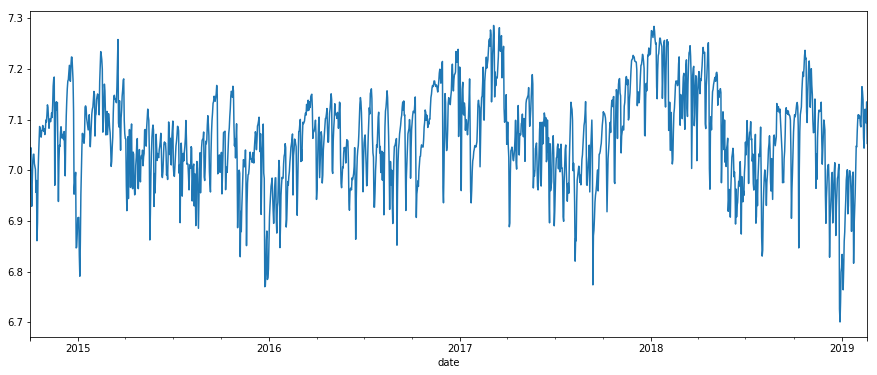

In [29]:
plt.figure(figsize=(15, 6))
df['pH'].plot();

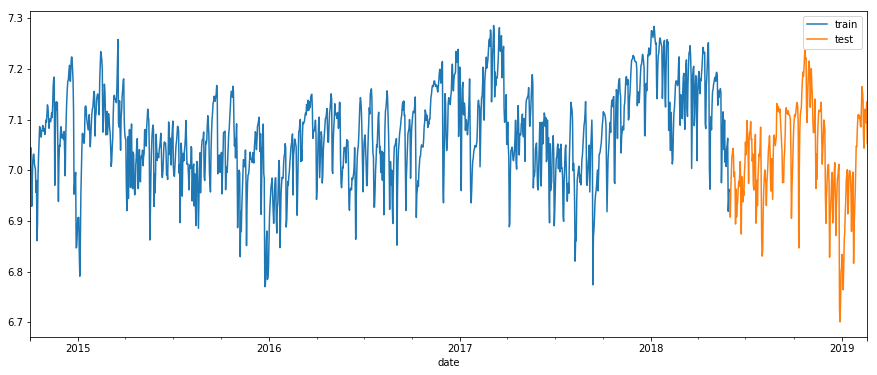

In [30]:
split_date = pd.Timestamp('2018-06-01')
df =  df['pH']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(15, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [31]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

C:\Users\HARI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\HARI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\HARI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single featur

In [32]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [67]:
nn_model = Sequential()
nn_model.add(Dense(10, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1339/1339 [==============================] - 2s 2ms/step - loss: 0.0361
Epoch 2/100
1339/1339 [==============================] - 2s 1ms/step - loss: 0.0322
Epoch 3/100
1339/1339 [==============================] - 2s 1ms/step - loss: 0.0316
Epoch 4/100
1339/1339 [==============================] - 2s 1ms/step - loss: 0.0312
Epoch 5/100
1339/1339 [==============================] - 2s 2ms/step - loss: 0.0310
Epoch 6/100
1339/1339 [==============================] - 2s 1ms/step - loss: 0.0310
Epoch 7/100
1339/1339 [==============================] - 2s 1ms/step - loss: 0.0309
Epoch 8/100
1339/1339 [==============================] - 2s 1ms/step - loss: 0.0309
Epoch 9/100
1339/1339 [==============================] - 2s 1ms/step - loss: 0.0309
Epoch 10/100
1339/1339 [==============================] - 2s 1ms/step - loss: 0.0309
Epoch 11/100
1339/1339 [==============================] - 2s 1ms/step - loss: 0.0309
Epoch 12/100
1339/1339 [==============================] - 2s 1ms/step - lo

In [68]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.736
The R2 score on the Test set is:	0.708


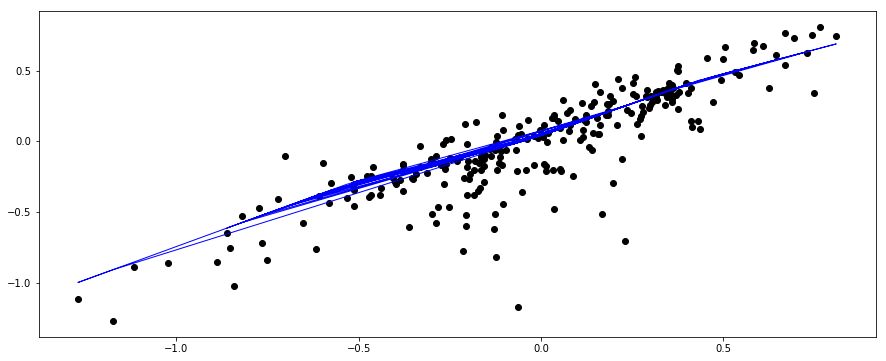

In [35]:
plt.figure(figsize=(15,6))
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,y_pred_test_nn,color='blue',linewidth=1)
plt.xticks()
plt.yticks()
plt.show()

In [36]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

In [37]:
for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

In [38]:
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

In [39]:
X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

In [40]:
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

In [41]:
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

In [42]:
X_train_lmse = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lmse = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [43]:
print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (1339, 1, 1)
Test shape:  (263, 1, 1)


In [71]:
lstm_model = Sequential()
lstm_model.add(LSTM(16, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
1339/1339 [==============================] - 6s 4ms/step - loss: 0.0389
Epoch 2/100
1339/1339 [==============================] - 4s 3ms/step - loss: 0.0324
Epoch 3/100
1339/1339 [==============================] - 3s 3ms/step - loss: 0.0317
Epoch 4/100
1339/1339 [==============================] - 4s 3ms/step - loss: 0.0314
Epoch 5/100
1339/1339 [==============================] - 4s 3ms/step - loss: 0.0312
Epoch 6/100
1339/1339 [==============================] - 4s 3ms/step - loss: 0.0311
Epoch 7/100
1339/1339 [==============================] - 3s 3ms/step - loss: 0.0310
Epoch 8/100
1339/1339 [==============================] - 3s 3ms/step - loss: 0.0310
Epoch 9/100
1339/1339 [==============================] - 3s 3ms/step - loss: 0.0310
Epoch 10/100
1339/1339 [==============================] - 4s 3ms/step - loss: 0.0309
Epoch 11/100
1339/1339 [==============================] - 3s 3ms/step - loss: 0.0309
Epoch 12/100
1339/1339 [==============================] - 4s 3ms/step - lo

In [72]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.742
The R2 score on the Test set is:	0.724


In [64]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

263/263 [==============================] - 1s 2ms/step
NN: 0.040224
LSTM: 0.039041


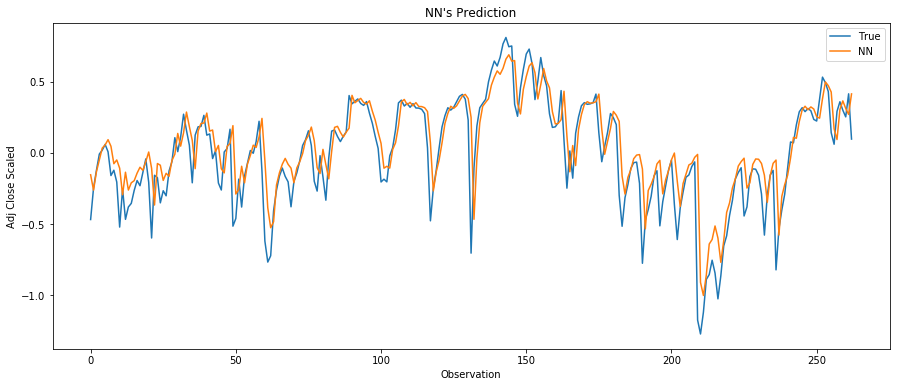

In [65]:
nn_y_pred_test = nn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

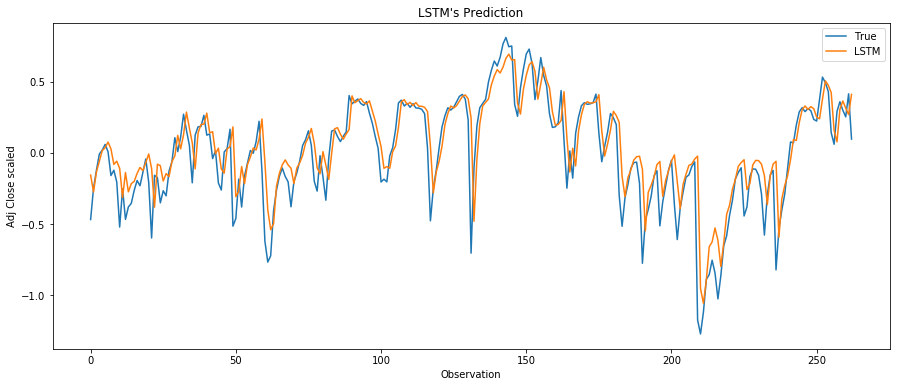

In [66]:
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();